## Notes from LinkedIn learning NLP classes

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [3]:
dir(nltk)

['ARLSTem',
 'ARLSTem2',
 'AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger',
 'BinaryMaxentFeatureEncoding',
 'BlanklineTokenizer',
 'BllipParser',
 'BottomUpChartParser',
 'BottomUpLeftCornerChartParser',
 'BottomUpProbabilisticChartParser',
 'Boxer',
 'BrillTagger',
 'BrillTaggerTrainer',
 'CFG',
 'CRFTagger',
 'CfgReadingCommand',
 'ChartParser',
 'ChunkParserI',
 'ChunkScore',
 'Cistem',
 'ClassifierBasedPOSTagger',
 'ClassifierBasedTagger',
 'ClassifierI',
 'ConcordanceIndex',
 'ConditionalExponentialClassifier',
 'ConditionalFreqDist',
 'ConditionalProbDist',
 'ConditionalProbDistI',
 'ConfusionMatrix',
 'ContextIndex',
 'ContextTagger',
 'ContingencyMeasures',
 'CoreNLPDependencyParser',
 'CoreNLPParser',
 'CrossValidationProbDist',
 'DRS',
 'DecisionTreeClassifier',
 'DefaultTagger',
 'DependencyEvaluator',
 'DependencyGrammar',
 'D

In [4]:
from nltk.corpus import stopwords

In [5]:
stopwords.words("english")[0:500:25]

['a', 'but', "hadn't", 'in', 'needn', 'she', "they'll", 'when']

## Reading in taxt data and we need to clean the text

In [6]:
# read in the raw text
rawdata = open("SMSSpamCollection.tsv").read()

In [7]:
rawdata[:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

In [8]:
# parse the data, here -> replace \t with \n
# split chops /n part and adds it like a list

parseddata = rawdata.replace("\t", "\n").split("\n")

In [9]:
parseddata[:10]

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham',
 "Nah I don't think he goes to usf, he lives around here though",
 'ham',
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 'ham',
 'I HAVE A DATE ON SUNDAY WITH WILL!!']

In [10]:
# seperate label list and text list

labellist = parseddata[0::2]
textlist = parseddata[1::2]

In [11]:
labellist[:10]

['ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam']

In [12]:
textlist[:10]

["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 "Nah I don't think he goes to usf, he lives around here though",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 'I HAVE A DATE ON SUNDAY WITH WILL!!',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mob

## Combine list and label so that they can be used for analysis

In [13]:
type(labellist)

list

In [14]:
type(textlist)

list

In [15]:
len(labellist)

5571

In [16]:
len(textlist)

5570

In [17]:
labellist[-5:]

['ham', 'ham', 'ham', 'ham', '']

In [18]:
textlist[-5:]

['This is the 2nd time we have tried 2 contact u. U have won the Â£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.',
 'Will Ã¼ b going to esplanade fr home?',
 'Pity, * was in mood for that. So...any other suggestions?',
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
 'Rofl. Its true to its name']

In [19]:
df = pd.DataFrame({
    "label": labellist[:-1],
    "body": textlist
})

In [20]:
df

,label,body
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
...,...,...
5565,spam,This is the 2nd time we have tried 2 contact u...
5566,ham,Will Ã¼ b going to esplanade fr home?
5567,ham,"Pity, * was in mood for that. So...any other s..."
5568,ham,The guy did some bitching but I acted like i'd...


In [21]:
Df = pd.read_csv("SMSSpamCollection.tsv", sep = "\t", header = None)
Df.columns = (["labels", "body"])

In [22]:
Df

,labels,body
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
...,...,...
5563,spam,This is the 2nd time we have tried 2 contact u...
5564,ham,Will ü b going to esplanade fr home?
5565,ham,"Pity, * was in mood for that. So...any other s..."
5566,ham,The guy did some bitching but I acted like i'd...


## Explore the data

In [23]:
# shape of data

Df.shape

(5568, 2)

In [24]:
# how many spams and hams

Df["labels"].value_counts()

labels
ham     4822
spam     746
Name: count, dtype: int64

In [25]:
# Missing value? 

Df.isnull().sum()

labels    0
body      0
dtype: int64

## Regular Expression

In [26]:
re_test = "This is a regex string to test 2 different methods"
re_test_messy = "This is    a regex string to        test 2 different     methods  "
re_test_moremessy = "This-is-a/ regex string>>>>>>>> to ,test. 2 different-methods"

## Spliting the sentence into a list of words

In [27]:
re.split("\s", re_test)

['This',
 'is',
 'a',
 'regex',
 'string',
 'to',
 'test',
 '2',
 'different',
 'methods']

In [28]:
re.split("\s+", re_test_messy)

['This',
 'is',
 'a',
 'regex',
 'string',
 'to',
 'test',
 '2',
 'different',
 'methods',
 '']

In [29]:
re.split("\W+", re_test_moremessy)

['This',
 'is',
 'a',
 'regex',
 'string',
 'to',
 'test',
 '2',
 'different',
 'methods']

In [30]:
# using a split allows us to tokenise by finding the characters that seperate the words

In [31]:
re.findall("\S+", re_test_moremessy)

['This-is-a/',
 'regex',
 'string>>>>>>>>',
 'to',
 ',test.',
 '2',
 'different-methods']

In [32]:
re.findall("\w+", re_test_moremessy)

['This',
 'is',
 'a',
 'regex',
 'string',
 'to',
 'test',
 '2',
 'different',
 'methods']

In [33]:
# use split or findall methods to tokenise messy sentences

# split() seraches for characters that split the words, using Caps reverses the search
# findall() searches for the actual words and reversed when used in caps

# \W and \w is used for words  (mostly used)
# \s and \S is used for white spaces

## More on regex

In [34]:
# replacing a specific sring

pep8 = "I try to follow PEP8 guidelines"
pep7 = "i try to follow PEP7 guidelines"
peep8 = "i try to follow PEEP8 guidlines"

In [35]:
# Get a pattern that catches pep8 as well as pep7 or peep8 and any other mistakes

re.findall("[a-z]+", pep8)

['try', 'to', 'follow', 'guidelines']

In [36]:
re.findall("[A-Z0-9]+", pep7) # this is letters or numbers 

['PEP7']

In [37]:
re.findall("[A-Z]+[0-9]+", peep8) # this is letters and numbers

['PEEP8']

In [38]:
# now that we got a proper regex, we replace the token with PEP8

In [39]:
re.sub("[A-Z]+[0-9]+", "PEP8", pep7)

'i try to follow PEP8 guidelines'

In [40]:
re.sub("[A-Z]+[0-9]+", "PEP8", peep8)

'i try to follow PEP8 guidlines'

In [41]:
# keep in mind this regex will not detect lowercase or space betweeen strings
# refine the regex

# try re.search(), re.match(), re.fullmatch(), re.finditer(), re.escape()

## Preprecessing the data

In [42]:
pd.set_option("display.max_colwidth", 100)

data = pd.read_csv("SMSSpamCollection.tsv", sep = "\t", header = None)
data.columns = ["label", "body_text"]

data.head(110)

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
...,...,...
105,ham,I know! Grumpy old people. My mom was like you better not be lying. Then again I am always the o...
106,ham,Dont worry. I guess he's busy.
107,ham,What is the plural of the noun research?
108,ham,Going for dinner.msg you after.


In [43]:
# Remove Punctuation

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

data["body_text_clean"] = data["body_text"].apply(lambda x: remove_punct(x))

data.head()

,label,body_text,body_text_clean
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


In [45]:
# Tolenization

def tokenize(text):
    tokens = re.split("\W", text)
    return tokens

data["body_text_tokenized"] = data["body_text_clean"].apply(lambda x: tokenize(x.lower()))

data.head()

,label,body_text,body_text_clean,body_text_tokenized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


In [46]:
# Remove stop words

stopword = nltk.corpus.stopwords.words("english")

stopword

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [47]:
def remove_stopwords(tokenised_list):
    text = [word for word in tokenised_list if word not in stopword]
    return text

data["body_text_nostop"] = data["body_text_tokenized"].apply(lambda x: remove_stopwords(x))

data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


## Advanced cleaning 

## Stemming

In [48]:
# Stemming

ps = nltk.PorterStemmer()

In [49]:
print(ps.stem("grows"))
print(ps.stem("growing"))

grow
grow


In [50]:
print(ps.stem("run"))
print(ps.stem("running"))
print(ps.stem("runner"))

run
run
runner


In [51]:
pd.set_option("display.max_colwidth", 100)

df = pd.read_csv("SMSSpamCollection.tsv", sep = "\t")
df.columns = (["label", "body_text"])

In [52]:
df

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...
...,...,...
5562,spam,This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy...
5563,ham,Will ü b going to esplanade fr home?
5564,ham,"Pity, * was in mood for that. So...any other suggestions?"
5565,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week ...


In [53]:
def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split("\W" ,text)
    text = [word for word in tokens if word not in stopword]
    return text

df["clean_text"] = df["body_text"].apply(lambda x: clean_text(x.lower()))

df.head()

,label,body_text,clean_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr..."


In [54]:
def stem(tokenized):
    text = [ps.stem(word) for word in tokenized]
    return text

df["stemmed text"] = df["clean_text"].apply(lambda x: stem(x))

df.head()

,label,body_text,clean_text,stemmed text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]","[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr...","[per, request, mell, mell, oru, minnaminungint, nurungu, vettam, set, callertun, caller, press, ..."


## Lemmatizing

In [55]:
wn = nltk.WordNetLemmatizer()

In [56]:
pd.set_option("display.max_colwidth", 100)

df2 = pd.read_csv("SMSSpamCollection.tsv", sep = "\t")
df2.columns = (["label", "body_text"])

df2.head()

def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split("\W" ,text)
    text = [word for word in tokens if word not in stopword]
    return text

df2["clean_text"] = df2["body_text"].apply(lambda x: clean_text(x.lower()))

df2.head()

,label,body_text,clean_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr..."


In [57]:
print(ps.stem("meanness"))
print(ps.stem("meaning"))
print(ps.stem("goose"))
print(ps.stem("geese"))

mean
mean
goos
gees


In [58]:
print(wn.lemmatize("meanness"))
print(wn.lemmatize("meaning"))
print(wn.lemmatize("goose"))
print(wn.lemmatize("geese"))

meanness
meaning
goose
goose


In [59]:
def lemm(tokenized):
    text = [wn.lemmatize(word) for word in tokenized]
    return text

df2["LLemmatized"] = df2["clean_text"].apply(lambda x: lemm(x))

df2.head()

,label,body_text,clean_text,LLemmatized
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, go, usf, life, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]","[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr...","[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, caller, pre..."


## Vectorize

## 1)Count Vectorizers

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
# Count vectorizer takes costom clean text functions
# Use analyzer or perprocessor to apply it.

def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split("\W" ,text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text

In [62]:
# Apply CV to the dataset

count_vect = CountVectorizer(analyzer = clean_text)
x_count = count_vect.fit_transform(df2["body_text"])
print(x_count.shape)
print(count_vect.get_feature_names_out())

(5567, 8188)
['' '0' '008704050406' ... 'ü' 'üll' '〨ud']


In [63]:
# Apply CV to a sample dataset

sample = df2[0:20]
sample

CV_sample = CountVectorizer(analyzer = clean_text)
X_Csample = CV_sample.fit_transform(sample["body_text"])
print(X_Csample.shape)
print(CV_sample.get_feature_names_out())

(20, 212)
['' '08002986030' '08452810075over18' '09061701461' '1' '100' '100000'
 '11' '12' '150pday' '16' '2' '20000' '2005' '21st' '3' '4'
 '4403ldnw1a7rw18' '4txtú120' '6day' '81010' '87077' '87121' '87575' '9'
 '900' 'a' 'aft' 'aid' 'alreadi' 'alright' 'anymor' 'appli' 'ard' 'around'
 'as' 'b' 'brother' 'call' 'caller' 'callertun' 'camera' 'cash' 'chanc'
 'claim' 'click' 'co' 'code' 'colour' 'comin' 'comp' 'copi' 'cost'
 'credit' 'cri' 'csh11' 'cup' 'custom' 'da' 'date' 'dont' 'eg' 'eh'
 'england' 'enough' 'entitl' 'entri' 'even' 'fa' 'feel' 'ffffffffff'
 'final' 'fine' 'finish' 'first' 'free' 'friend' 'from' 'go' 'goalsteam'
 'goe' 'gonna' 'gota' 'ha' 'had' 'have' 'he' 'hl' 'home' 'hour' 'httpwap'
 'i' 'im' 'info' 'is' 'ive' 'jackpot' 'joke' 'k' 'kim' 'kl341' 'lar'
 'latest' 'lccltd' 'like' 'link' 'live' 'lor' 'lunch' 'macedonia' 'make'
 'may' 'meet' 'mell' 'membership' 'messag' 'minnaminungint' 'miss' 'mobil'
 'month' 'nah' 'name' 'nation' 'naughti' 'network' 'news' 'next' 'no'
 

## Vectorizre output matrices

In [64]:
# Convert the output into proper dataframe as they are in sparse matrice form

X_Csample # the model

<20x212 sparse matrix of type '<class 'numpy.int64'>'
	with 245 stored elements in Compressed Sparse Row format>

In [65]:
C_df = pd.DataFrame(X_Csample.toarray())
C_df

,0,1,2,3,4,5,6,7,8,9,...,202,203,204,205,206,207,208,209,210,211
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0


In [66]:
# See what columns actually represent

C_df.columns = CV_sample.get_feature_names_out()
C_df

,,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,...,winner,with,wkli,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,you,ü
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0


## 2) N-grams

In [67]:
# n-grams:- instead of documeneting single token n length of words are stored
# the cleaning process is different: in count vectorize we passes a
# clean text function that cleaned and tokenized the data for us. Here it wants a string passed into it so it can 
# look for the words asjecent to it.

def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split("\W" ,text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopword]) ## here add " ".join function
    return text

df2["Cleaned_text"] = df2["body_text"].apply(lambda x: clean_text(x))

df2.head()

,label,body_text,clean_text,LLemmatized,Cleaned_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...",free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, go, usf, life, around, though]",nah i dont think goe usf live around though
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]",even brother like speak they treat like aid patent
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]","[date, sunday]",i have a date on sunday with will
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr...","[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, caller, pre...",as per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi fri...


In [68]:
# Apply countvectorizer with n-grams

ngram = CountVectorizer(ngram_range = (2,2)) # 2,2 for bigrams
model = ngram.fit_transform(df2["Cleaned_text"])
print(model.shape)
print(ngram.get_feature_names_out())

(5567, 34114)
['008704050406 sp' '0089mi last' '0121 2025050' ... 'üll submit'
 'üll take' '〨ud even']


In [69]:
# Apply n-grams to a sample dataset

data_sample = df2[0:20]
sample

ngram_sample = CountVectorizer(ngram_range = (2,2))
model_sample = ngram_sample.fit_transform(data_sample["Cleaned_text"])
print(model_sample.shape)
print(ngram_sample.get_feature_names_out())

(20, 217)
['09061701461 claim' '100 20000' '100000 prize' '11 month' '12 hour'
 '150pday 6day' '16 tsandc' '20000 pound' '2005 text' '21st may'
 '4txtú120 poboxox36504w45wq' '6day 16' '81010 tc' '87077 eg'
 '87077 trywal' '87121 receiv' '87575 cost' '900 prize' 'aft finish'
 'aid patent' 'alright way' 'anymor tonight' 'appli 08452810075over18'
 'appli repli' 'ard smth' 'around though' 'as per' 'as valu'
 'brother like' 'call 09061701461' 'call the' 'caller press'
 'callertun caller' 'camera free' 'cash from' 'chanc win' 'claim call'
 'claim code' 'claim no' 'click httpwap' 'click wap' 'co free'
 'code kl341' 'colour mobil' 'comp win' 'copi friend' 'cost 150pday'
 'credit click' 'cri enough' 'csh11 send' 'cup final' 'custom select'
 'da stock' 'date on' 'dont miss' 'dont think' 'dont want' 'eg england'
 'eh rememb' 'england 87077' 'england macedonia' 'enough today'
 'entitl updat' 'entri questionstd' 'entri wkli' 'even brother' 'fa 87121'
 'fa cup' 'feel that' 'ffffffffff alright' 'fina

In [70]:
model_df = pd.DataFrame(model_sample.toarray())
model_df.columns = ngram_sample.get_feature_names_out()
model_df

,09061701461 claim,100 20000,100000 prize,11 month,12 hour,150pday 6day,16 tsandc,20000 pound,2005 text,21st may,...,win cash,win fa,winner as,with will,wkli comp,word claim,wwwdbuknet lccltd,xxxmobilemovieclub to,ye he,you week
0,0,0,0,0,0,0,0,0,1,1,...,0,1,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


## 2) TF-IDF

In [71]:
pd.set_option("display.max_colwidth", 100)

data = pd.read_csv("SMSSpamCollection.tsv", sep = "\t", header = None)
data.columns = ["label", "body_text"]

data.head(110)

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
...,...,...
105,ham,I know! Grumpy old people. My mom was like you better not be lying. Then again I am always the o...
106,ham,Dont worry. I guess he's busy.
107,ham,What is the plural of the noun research?
108,ham,Going for dinner.msg you after.


In [72]:
## clean text is same as count vect method

def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split("\W" ,text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text

In [73]:
# apply TFIDF

# from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf.fit_transform(data["body_text"])
print(X_tfidf.shape)
print(tfidf.get_feature_names_out())

(5568, 8191)
['' '0' '008704050406' ... 'ü' 'üll' '〨ud']


In [74]:
# Sample

data_sample = df2[0:20]
sample

tfidf_sample = TfidfVectorizer(analyzer = clean_text)
x_tfidf_sample = tfidf_sample.fit_transform(data_sample["body_text"])
print(x_tfidf_sample.shape)
print(tfidf_sample.get_feature_names_out())

(20, 212)
['' '08002986030' '08452810075over18' '09061701461' '1' '100' '100000'
 '11' '12' '150pday' '16' '2' '20000' '2005' '21st' '3' '4'
 '4403ldnw1a7rw18' '4txtú120' '6day' '81010' '87077' '87121' '87575' '9'
 '900' 'a' 'aft' 'aid' 'alreadi' 'alright' 'anymor' 'appli' 'ard' 'around'
 'as' 'b' 'brother' 'call' 'caller' 'callertun' 'camera' 'cash' 'chanc'
 'claim' 'click' 'co' 'code' 'colour' 'comin' 'comp' 'copi' 'cost'
 'credit' 'cri' 'csh11' 'cup' 'custom' 'da' 'date' 'dont' 'eg' 'eh'
 'england' 'enough' 'entitl' 'entri' 'even' 'fa' 'feel' 'ffffffffff'
 'final' 'fine' 'finish' 'first' 'free' 'friend' 'from' 'go' 'goalsteam'
 'goe' 'gonna' 'gota' 'ha' 'had' 'have' 'he' 'hl' 'home' 'hour' 'httpwap'
 'i' 'im' 'info' 'is' 'ive' 'jackpot' 'joke' 'k' 'kim' 'kl341' 'lar'
 'latest' 'lccltd' 'like' 'link' 'live' 'lor' 'lunch' 'macedonia' 'make'
 'may' 'meet' 'mell' 'membership' 'messag' 'minnaminungint' 'miss' 'mobil'
 'month' 'nah' 'name' 'nation' 'naughti' 'network' 'news' 'next' 'no'
 

In [75]:
tfidf_df = pd.DataFrame(x_tfidf_sample.toarray())
tfidf_df.columns = tfidf_sample.get_feature_names_out()
tfidf_df

,,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,...,winner,with,wkli,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,you,ü
0,0.000000,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.36447,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.173871,0.000000,0.000000,0.219209,0.000000,0.000000,0.000000,0.000000,0.219209,0.000000,...,0.219209,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.190382,0.000000,0.000000,0.000000,0.000000,0.000000,0.190382,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.219424,0.000000,0.000000,0.000000,0.219424,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.185641,0.000000,0.000000,0.000000,0.234047,0.000000,0.234047,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.234047,0.234047,0.000000,0.000000,0.000000,0.234047,0.000000


## Feature Engineering

In [76]:
# woring on raw uncleaned text

data = pd.read_csv("SMSSpamCollection.tsv", sep = "\t")
data.columns = ["label", "text_body"]

data.head(5)

,label,text_body
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


### 1) Create features

In [77]:
# Think to new feature based on existing data that is available
# Hypotiesis 1: spams are generally longer than normal messages
  
data["F1 body length"] = data["text_body"].apply(lambda x: len(x) - x.count(" "))
data.head(5)

,label,text_body,F1 body length
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128
1,ham,"Nah I don't think he goes to usf, he lives around here though",49
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135


In [78]:
# Hypothesis 2: spams are more punctual than normal messages

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")),3)*100

data["F2 Punct%"] = data["text_body"].apply(lambda x: count_punct(x))
data.head(5)

,label,text_body,F1 body length,F2 Punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135,4.4


### Evaluate features

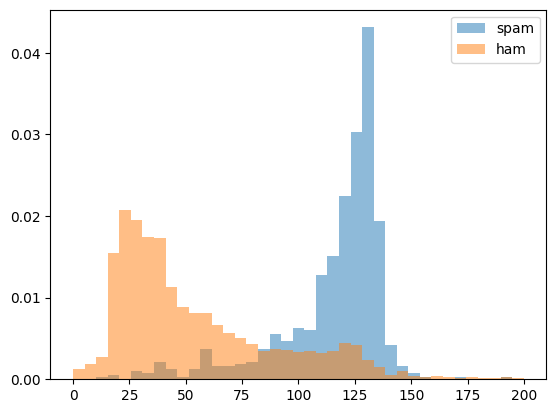

In [79]:
bins = np.linspace(0,200,40)  # an array that gets us 40 evenly space between 0 and 200

plt.hist(data[data["label"]=="spam"]["F1 body length"], bins, alpha = 0.5, density = True,  label = "spam")
plt.hist(data[data["label"]=="ham"]["F1 body length"], bins, alpha = 0.5, density = True,  label = "ham")
plt.legend()
plt.show()

In [80]:
# This proves that spams tends to be longer than regular messages
# this extra feature is helpful  for the model

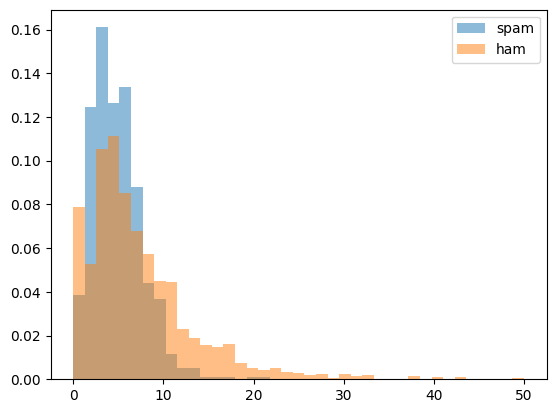

In [81]:
bins = np.linspace(0,50,40)  # an array that gets us 40 evenly space between 0 and 50

plt.hist(data[data["label"]=="spam"]["F2 Punct%"], bins, alpha = 0.5, density = True,  label = "spam")
plt.hist(data[data["label"]=="ham"]["F2 Punct%"], bins, alpha = 0.5, density = True,  label = "ham")
plt.legend()
plt.show()

In [82]:
# This hypothesis is not very accurate as both spam and regular messages have same amount of punctuation
# we can trial and error this feature in model just to see what kind of results it gives

### 2) Transform features

In [83]:
# we are looking at a distribution of the data in the features, and see which might be a fit for transformation
# we generally look  for a dramatic skew or few outliers, maybe a tail coming out

data.head(5)

,label,text_body,F1 body length,F2 Punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135,4.4


Text(0.5, 1.0, 'Body length distribution')

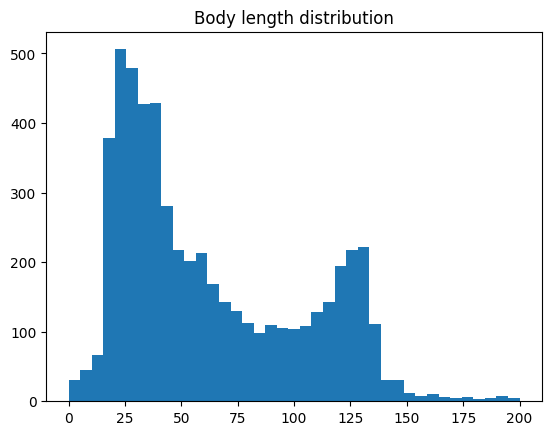

In [84]:
plt.hist(data["F1 body length"], bins = np.linspace(0, 200, 40))
plt.title("Body length distribution")

Text(0.5, 1.0, 'Puncutation % distribution')

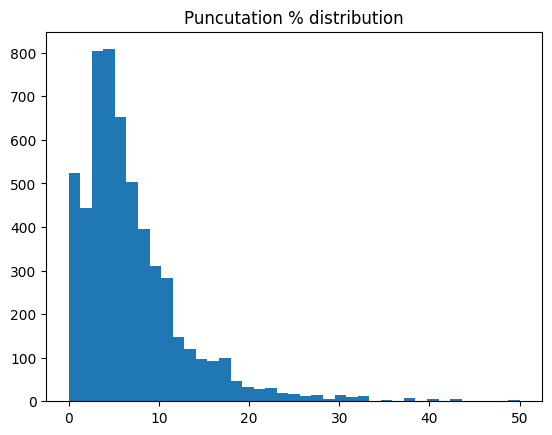

In [85]:
plt.hist(data["F2 Punct%"], bins = np.linspace(0, 50, 40))
plt.title("Puncutation % distribution")

In [86]:
# The Punct feature seems suitable for transformation

# A transformation is a process that alters each data points in a systematic way in a column that makes it
# cleaner for the model to use. s   

# Process
# 1) Determine the range of exponent to test
# 2) Apply each transformation to each value of ur chosen feature
# 3) Use some criteria to determine which of the transformation yields the best distribution

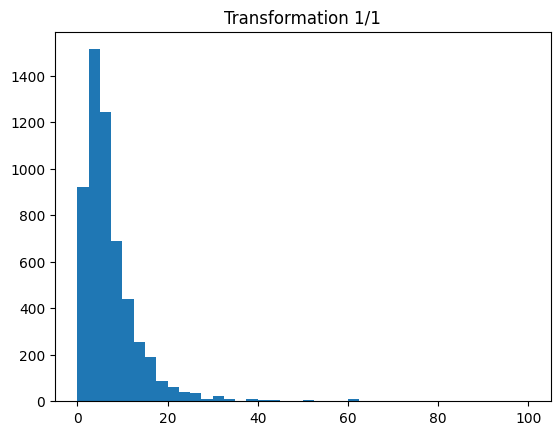

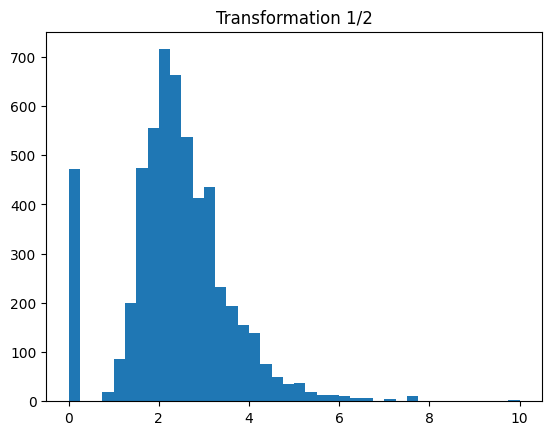

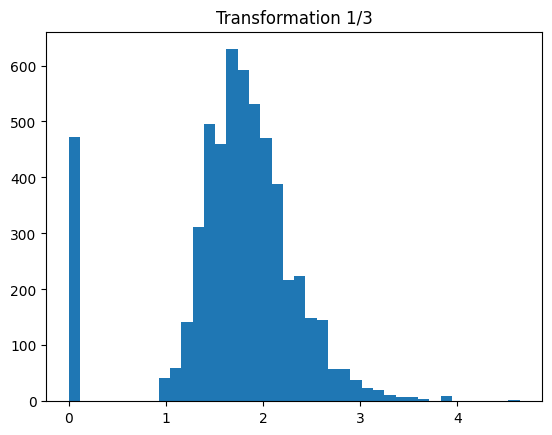

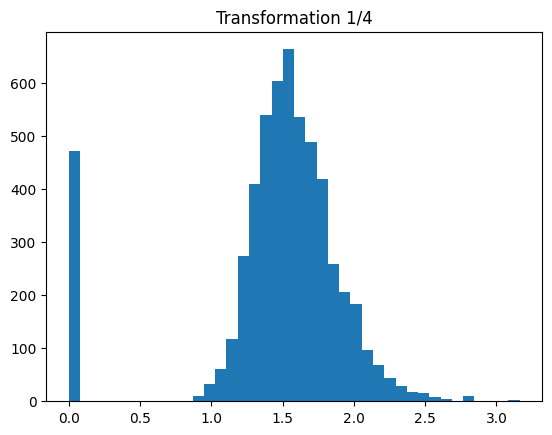

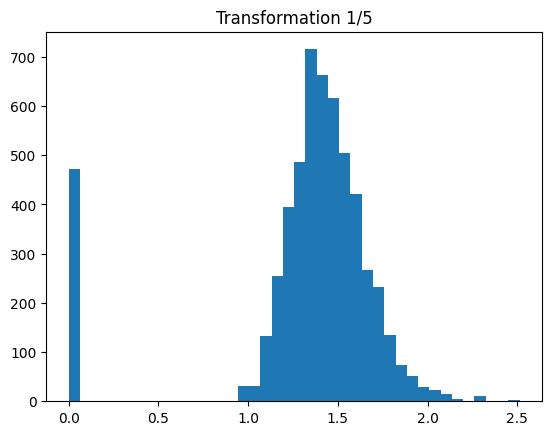

In [87]:
# Using only +ve exponents

for i in [1,2,3,4,5]:
    plt.hist(data["F2 Punct%"]**(1/i), bins = 40)
    plt.title("Transformation 1/{}".format(str(i)))
    plt.show()

In [88]:
# Here the 4th and 5th plots look usable

## Build a Basic Random Forest Classifier

### 1) Test the libraries

In [89]:
# woring on raw uncleaned text

data = pd.read_csv("SMSSpamCollection.tsv", sep = "\t")
data.columns = ["label", "text_body"]

data.head(5)

,label,text_body
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


In [90]:
# we already have 2 new features extranced
# cleaning and vectorizing the data

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    token = re.split("\W+", text)
    text = [ps.stem(word) for word in token if word not in stopword]
    return text

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(data["text_body"])
df = pd.DataFrame(X_tfidf.toarray())

df["body_length"] = data["text_body"].apply(lambda x: len(x) - x.count(" "))
df["Punct"] = data["text_body"].apply(lambda x: count_punct(x))

df.head()

,0,1,2,3,4,5,6,7,8,9,...,8096,8097,8098,8099,8100,8101,8102,8103,body_length,Punct
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128,4.7
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49,4.1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62,3.2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28,7.1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135,4.4


In [91]:
# from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

df.columns = df.columns.astype(str) # imporrtant for newer version
X = df
y = data["label"]

In [92]:
rf = RandomForestClassifier(n_jobs = -1)
k_fold = KFold(n_splits = 5)
cross_val_score(rf, X, y, cv = k_fold, scoring = "accuracy", n_jobs = -1)

array([0.97576302, 0.98204668, 0.97484277, 0.9640611 , 0.97304582])

### 2) Explore the results in little more detail via RF on a holdout test set

In [93]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 121)

In [95]:
rf = RandomForestClassifier(n_jobs = -1, n_estimators = 50, max_depth = 20)  # tune hyperparameters
model = rf.fit(X_train, y_train)

In [96]:
sorted(zip(model.feature_importances_, X_train.columns), reverse = True)[0:10]

[(0.0697577805396569, 'body_length'),
 (0.03850288725716804, '7350'),
 (0.03340383071208533, '3134'),
 (0.026802819751748426, '2031'),
 (0.024339502488271342, '1361'),
 (0.024138480415469656, '6285'),
 (0.022677678006854527, '1803'),
 (0.02185630405304031, '7782'),
 (0.021681873637537052, '7027'),
 (0.018045871469047164, '5724')]

In [97]:
y_pred = model.predict(X_test)

In [98]:
print(f"Precision: {precision_score(y_test, y_pred, pos_label='spam'):.3f}")
print(f"Recall:    {recall_score(y_test, y_pred, pos_label='spam'):.3f}")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.3f}")


Precision: 1.000
Recall:    0.617
Accuracy:  0.952


In [99]:
# 60% recall states that 60% mails that were spams went to spam folder but 40% made it to inbox, not a great model
# Trying Grid Search

### Explore RF model with Grid search

In [100]:
# Setting a range of number of estimators and range of max depth and the grid search will
# test every combination of those hyperparameters and give out the best ones

In [101]:
def train_RF(n_est, depth):
    RF = RandomForestClassifier(n_estimators = n_est, max_depth = depth, n_jobs = -1)
    model = RF.fit(X_train, y_train)
    y_pred = RF.predict(X_test)
    print(f"Est: {n_est} / Depth: {depth} /Precision: {precision_score(y_test, y_pred, pos_label='spam'):.3f}")
    print(f"Est: {n_est} / Depth: {depth} /Recall:    {recall_score(y_test, y_pred, pos_label='spam'):.3f}")
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.3f}")

In [102]:
for n_est in [10, 50, 100]:
    for depth in [10,20, 30, None]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 /Precision: 1.000
Est: 10 / Depth: 10 /Recall:    0.277
Accuracy:  0.908
Est: 10 / Depth: 20 /Precision: 1.000
Est: 10 / Depth: 20 /Recall:    0.596
Accuracy:  0.949
Est: 10 / Depth: 30 /Precision: 1.000
Est: 10 / Depth: 30 /Recall:    0.695
Accuracy:  0.961
Est: 10 / Depth: None /Precision: 0.967
Est: 10 / Depth: None /Recall:    0.844
Accuracy:  0.977
Est: 50 / Depth: 10 /Precision: 1.000
Est: 50 / Depth: 10 /Recall:    0.213
Accuracy:  0.900
Est: 50 / Depth: 20 /Precision: 1.000
Est: 50 / Depth: 20 /Recall:    0.603
Accuracy:  0.950
Est: 50 / Depth: 30 /Precision: 1.000
Est: 50 / Depth: 30 /Recall:    0.730
Accuracy:  0.966
Est: 50 / Depth: None /Precision: 1.000
Est: 50 / Depth: None /Recall:    0.851
Accuracy:  0.981
Est: 100 / Depth: 10 /Precision: 1.000
Est: 100 / Depth: 10 /Recall:    0.170
Accuracy:  0.895
Est: 100 / Depth: 20 /Precision: 1.000
Est: 100 / Depth: 20 /Recall:    0.589
Accuracy:  0.948
Est: 100 / Depth: 30 /Precision: 1.000
Est: 100 / Depth: 3

#### Grid search : Exhaustatively search all parameters in a given grid to determine the best model parameter
#### Cross Validation : Divide a dataset into k subsets and repeat the holdout method k times where a different subset is used as holdout in each iteration

In [103]:
# testing which one is better for this data
# Tfidf VS Count vectorizer

data = pd.read_csv("SMSSpamCollection.tsv", sep = "\t")
data.columns = ["label", "text_body"]

data.head(5)

,label,text_body
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


In [183]:
# writing fresh code to practice

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    token = re.split("\W+", text)
    text = [ps.stem(word) for word in token if word not in stopword]
    return text

def punct(text):
    count = sum([1 for word in text if word in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data["punct%"] = data["text_body"].apply(lambda x: punct(x))
data["str_len"] = data["text_body"].apply(lambda x: len(x) - x.count(" "))

# TFIDF
tfidf = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf.fit_transform(data["text_body"])
X_tfidf_df = pd.concat([data["punct%"], data["str_len"], pd.DataFrame(X_tfidf.toarray())], axis = 1)
X_tfidf_df.columns = X_tfidf_df.columns.astype(str)

# Count Vect
countV = CountVectorizer(analyzer = clean_text)
X_countV = countV.fit_transform(data["text_body"])
X_countV_df = pd.concat([data["punct%"], data["str_len"], pd.DataFrame(X_countV.toarray())], axis = 1)
X_countV_df.columns = X_countV_df.columns.astype(str)

print(X_tfidf_df.head(5))
print(X_countV_df.head(5))

   punct%  str_len    0    1    2    3    4    5    6    7  ...  8094  8095  \
0     4.7      128  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
1     4.1       49  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
2     3.2       62  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
3     7.1       28  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
4     4.4      135  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   

   8096  8097  8098  8099  8100  8101  8102  8103  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 8106 columns]
   punct%  str_len  0  1  2  3  4  5  6  7  ...  8094  8095  8096  8097  8098  \
0     4.7      128  0  0  0  0  0  0  0  0  ...     0     0     0     0     0   
1     4.1       49  0  0  

### Exploring Parameter setting using GridSearchCV

In [184]:
rf = RandomForestClassifier()
param = {"n_estimators" : [10,150,300],
        "max_depth" : [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv = 5, n_jobs = -1)
gs_fit = gs.fit(X_tfidf_df, data["label"])
pd.DataFrame(gs_fit.cv_results_).sort_values("mean_test_score", ascending = False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,34.585509,3.118403,0.759024,0.343521,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.981149,0.977558,0.972147,0.968553,0.975741,0.975030,0.004350,1
8,62.265251,2.698078,0.473284,0.099636,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.977558,0.979354,0.973944,0.969452,0.973046,0.974671,0.003483,2
6,4.695649,0.510766,0.261742,0.060105,90,10,"{'max_depth': 90, 'n_estimators': 10}",0.979354,0.979354,0.975741,0.969452,0.968553,0.974491,0.004680,3
11,42.424997,2.976981,0.251807,0.070725,None,300,"{'max_depth': None, 'n_estimators': 300}",0.977558,0.976661,0.973944,0.968553,0.972147,0.973773,0.003243,4
10,34.020112,2.225604,0.353148,0.074202,None,150,"{'max_depth': None, 'n_estimators': 150}",0.977558,0.975763,0.973944,0.967655,0.968553,0.972695,0.003929,5


In [185]:
rf = RandomForestClassifier()
param = {"n_estimators" : [10,150,300],
        "max_depth" : [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv = 5, n_jobs = -1)
gs_fit = gs.fit(X_countV_df, data["label"])
pd.DataFrame(gs_fit.cv_results_).sort_values("mean_test_score", ascending = False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,42.747886,0.897820,0.258213,0.025977,None,300,"{'max_depth': None, 'n_estimators': 300}",0.977558,0.975763,0.973944,0.968553,0.971249,0.973414,0.003203,1
7,26.644741,1.103233,0.422487,0.037457,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.977558,0.973070,0.973944,0.967655,0.971249,0.972695,0.003251,2
8,54.757545,0.807354,0.498907,0.051820,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.976661,0.975763,0.973944,0.967655,0.969452,0.972695,0.003539,3
3,3.876324,1.382589,0.267957,0.088475,60,10,"{'max_depth': 60, 'n_estimators': 10}",0.976661,0.972172,0.975741,0.969452,0.968553,0.972516,0.003249,4
10,30.718107,1.070563,0.388148,0.073464,None,150,"{'max_depth': None, 'n_estimators': 150}",0.976661,0.973968,0.972147,0.967655,0.971249,0.972336,0.002983,5


## Ensemble Method
### Tech that creates multiple models and then combines them to produce better results than any of the single individually

### Gradient boosting and is a ensemble method that take iterrative approach focusing on mistakes on prior models

### Random Forest is a "Bagging" based method --> Training is done in parallel, Unweighted voting, Easier to tune, harder to overfit

### Gradient Boosting is "Boosting" based method --> Training is done iteratevely, weighted votes, Harrder to tune easy to overfit

### GB is more powerfull if tuned properly

In [116]:
# Explore GradientBoosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

In [117]:
# Build ur own Grid search
# The attributes and methods are similar to a random forest
# Random forest is built with fully grown trees and Gradient boosting is built with basic trees

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [120]:
# Using tfidf as vectorizer
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_df, data["label"], test_size = 0.2)

In [135]:
def train_GB(est, max_depth, lr):
    gb = GradientBoostingClassifier(n_estimators = est, max_depth = max_depth, learning_rate = lr)
    gb_model = gb.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label = "spam", average = "binary", zero_division=0) # give 4 variables to output to in the respective order
    print("Est: {} / Depth: {} / LR: {} -----  Precision: {} / Recall: {} / Accuracy: {}".format(est, max_depth, lr, round(precision, 3), round(recall, 3), round((y_pred == y_test).sum()/len(y_pred), 3)))

In [136]:
for n_est in [50, 100, 150]:
    for max_depth in [3, 7, 11, 15]:
        for lr in [0.01, 0.1, 1]:
            train_GB(n_est, max_depth, lr)

Est: 50 / Depth: 3 / LR: 0.01 -----  Precision: 0.0 / Recall: 0.0 / Accuracy: 0.859
Est: 50 / Depth: 3 / LR: 0.1 -----  Precision: 0.979 / Recall: 0.892 / Accuracy: 0.982
Est: 50 / Depth: 3 / LR: 1 -----  Precision: 0.828 / Recall: 0.86 / Accuracy: 0.955
Est: 50 / Depth: 7 / LR: 0.01 -----  Precision: 0.0 / Recall: 0.0 / Accuracy: 0.859
Est: 50 / Depth: 7 / LR: 0.1 -----  Precision: 0.979 / Recall: 0.873 / Accuracy: 0.979
Est: 50 / Depth: 7 / LR: 1 -----  Precision: 0.94 / Recall: 0.892 / Accuracy: 0.977
Est: 50 / Depth: 11 / LR: 0.01 -----  Precision: 0.0 / Recall: 0.0 / Accuracy: 0.859
Est: 50 / Depth: 11 / LR: 0.1 -----  Precision: 0.95 / Recall: 0.841 / Accuracy: 0.971
Est: 50 / Depth: 11 / LR: 1 -----  Precision: 0.964 / Recall: 0.86 / Accuracy: 0.976
Est: 50 / Depth: 15 / LR: 0.01 -----  Precision: 0.0 / Recall: 0.0 / Accuracy: 0.859
Est: 50 / Depth: 15 / LR: 0.1 -----  Precision: 0.905 / Recall: 0.854 / Accuracy: 0.967
Est: 50 / Depth: 15 / LR: 1 -----  Precision: 0.906 / Recall

#### The result shows that the poorly performing models are the one with LR = 0.01 and Est = 50
#### The Best preforming models are the one with LR = 0.1 and Est = 150

## Now to evaluate grird search boosting with Grridsearch CV

In [144]:
gb1  = GradientBoostingClassifier()
param1 = {"n_estimators" : [100, 150],  # As u can see above 100 and 150 generated the best models
       "max_depth" : [7, 11, 15],    
       "learning_rate" : [0.1]}     # Setting to default

gs1 = GridSearchCV(gb1, param1, cv = 5, n_jobs = -1)
model_tfidf = gs1.fit(X_tfidf_df, data["label"])
pd.DataFrame(model_tfidf.cv_results_).sort_values("mean_test_score", ascending = False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.789229,0.121978,0.008319,0.000279,0.1,7,100,"{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}",0.977558,0.982047,0.972147,0.975741,0.974843,0.976467,0.003291,1
1,9.022005,0.186191,0.010519,0.000701,0.1,7,150,"{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}",0.976661,0.981149,0.972147,0.975741,0.975741,0.976288,0.002881,2
2,9.577324,0.097397,0.012014,0.000619,0.1,11,100,"{'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 100}",0.978456,0.982047,0.969452,0.964960,0.972147,0.973412,0.006144,3
3,13.930629,0.472853,0.012312,0.001331,0.1,11,150,"{'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 150}",0.978456,0.979354,0.973046,0.963163,0.972147,0.973233,0.005786,4
4,10.012894,0.999089,0.008816,0.000983,0.1,15,100,"{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 100}",0.973070,0.982944,0.960467,0.967655,0.964960,0.969819,0.007728,5


In [145]:
gb2  = GradientBoostingClassifier()
param2 = {"n_estimators" : [100, 150],  # As u can see above 100 and 150 generated the best models
       "max_depth" : [7, 11, 15],    
       "learning_rate" : [0.1]}     # Setting to default

gs2 = GridSearchCV(gb2, param2, cv = 5, n_jobs = -1)
model_count = gs2.fit(X_countV_df, data["label"])
pd.DataFrame(model_count.cv_results_).sort_values("mean_test_score", ascending = False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,7.561410,0.142904,0.015648,0.004078,0.1,11,150,"{'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 150}",0.973968,0.981149,0.975741,0.974843,0.975741,0.976288,0.002518,1
1,4.059083,0.271656,0.011448,0.000588,0.1,7,150,"{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}",0.975763,0.980251,0.973944,0.975741,0.975741,0.976288,0.002101,2
0,2.712732,0.194355,0.010558,0.000568,0.1,7,100,"{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}",0.977558,0.979354,0.973944,0.974843,0.974843,0.976108,0.002026,3
2,4.911756,0.257978,0.010542,0.000627,0.1,11,100,"{'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 100}",0.975763,0.981149,0.973046,0.973046,0.974843,0.975569,0.002981,4
4,6.293405,0.522427,0.012972,0.001230,0.1,15,100,"{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 100}",0.968582,0.983842,0.974843,0.970350,0.969452,0.973414,0.005643,5


# Final model selection

### So far we are were transforming the entire dataset, now we will train vectorizer on training set and use that to transform the test set

### Fit the best RF and GB on train set and predict on test set and then evaulate and pick the best one

In [196]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    token = re.split("\W+", text)
    text = [ps.stem(word) for word in token if word not in stopword]
    return text

In [197]:
X_train, X_test, y_train, y_test = train_test_split(data[["text_body", "punct%", "str_len"]], data["label"], test_size = 0.2, random_state = 123)

In [201]:
tfidf = TfidfVectorizer(analyzer = clean_text)
tfidf_train = tfidf.fit_transform(X_train["text_body"]) # fits only on train data
tfidf_test = tfidf.transform(X_test["text_body"])

# concat back together to get x featurrers

X_train_vect = pd.concat([X_train[["str_len", "punct%"]].reset_index(drop = True), pd.DataFrame(tfidf_train.toarray())], axis = 1)
X_test_vect = pd.concat([X_test[["str_len", "punct%"]].reset_index(drop = True), pd.DataFrame(tfidf_test.toarray())], axis = 1)

X_train_vect.columns = X_train_vect.columns.astype(str)
X_test_vect.columns = X_test_vect.columns.astype(str)


X_train_vect.head()

,str_len,punct%,0,1,2,3,4,5,6,7,...,7149,7150,7151,7152,7153,7154,7155,7156,7157,7158
0,23,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,117,8.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,113,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18,5.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [202]:
import time

In [203]:
rf = RandomForestClassifier(n_jobs = -1, n_estimators = 150, max_depth = None) 

start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end-start)

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = (end-start)

precision, recall, fscore, support = score(y_test, y_pred, pos_label = "spam", average = "binary", zero_division=0)
print("fit time: {} / Predict_time: {} ------- Precision: {} / Recall: {} / Accuracy: {}".format(round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred == y_test).sum()/len(y_pred), 3)))

fit time: 1.71 / Predict_time: 0.111 ------- Precision: 0.983 / Recall: 0.793 / Accuracy: 0.97


In [204]:
gb = GradientBoostingClassifier(n_estimators = 150, max_depth = 11) 

start = time.time()
gb_model = gb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end-start)

start = time.time()
y_pred = gb_model.predict(X_test_vect)
end = time.time()
pred_time = (end-start)

precision, recall, fscore, support = score(y_test, y_pred, pos_label = "spam", average = "binary", zero_division=0)
print("fit time: {} / Predict_time: {} ------- Precision: {} / Recall: {} / Accuracy: {}".format(round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred == y_test).sum()/len(y_pred), 3)))

fit time: 125.8 / Predict_time: 0.145 ------- Precision: 0.912 / Recall: 0.827 / Accuracy: 0.966
